**PROJET FINAL: Score Editorial Anime**

    Identifier rapidement des animés "à forte valeur éditoriale" à partir de données limitées pour une plateforme de streaming.

    Je commence par importer mes outils

In [1]:
import pandas as pd # pour manipuler les données
import numpy as np # pour les calculs 
import matplotlib.pyplot as plt # pour les graphiques
import seaborn as sns # pour rendre les graphiques visuellement attractifs

    Je charge mon fichier CSV puis affiche les 5 premières lignes

In [2]:
df = pd.read_csv("animes.csv")
df.head()
print(f"Le fichier a bien été chargé")

Le fichier a bien été chargé


    Je me renseigne sur le fichier

In [3]:
# Taille du tableau sur lequel je vais travailler
lignes, colonnes = df.shape # lignes = animés, colonnes = types d'informations
print(f"Notre tableau contient: ")
print(f"{lignes} animés et {colonnes} types d'informations")

Notre tableau contient: 
73 animés et 17 types d'informations


In [4]:
# Type d'informations que je possède
print(f"Voici le type d'informations disponibles: ")

for i, col in enumerate (df.columns, 1):
    print(f" {i:}. {col}")

Voici le type d'informations disponibles: 
 1. Anime
 2. Genre_Tags
 3. Source
 4. Nb_Episodes
 5. Status
 6. Studio
 7. Date_Pub
 8. Note_Globale
 9. Note_Meilleur_Ep
 10. Meilleur_Ep_Titre
 11. Comm_Meilleur_Ep
 12. Note_Pire_Ep
 13. Pire_Ep_Titre
 14. Comm_Pire_Ep
 15. Comm_Saison_1
 16. Comm_Saison_2
 17. Comm_Saison_3


**Statistiques**

In [5]:
# Je vérifie les statistiques des colonnes numériques
df.describe()

,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,73.000000,73.000000,73.000000,73.000000
mean,80.863014,8.297260,9.308219,6.745205
std,149.953263,0.505243,0.449924,1.317093
min,3.000000,6.000000,8.200000,0.000000
25%,24.000000,8.100000,9.100000,6.300000
50%,32.000000,8.400000,9.400000,7.200000
75%,74.000000,8.600000,9.700000,7.500000
max,1090.000000,9.300000,9.900000,8.400000


    J'ai détecté une anomalie, dans 'min' > 'Note_Pire_Ep', il y a une valeur égale à 0. Cela peut poser problème car ça va inévitablement fausser mes calculs. 
    
    Également, on peut noter un grand écart dans le nombre d'épisodes (Nb_Episodes): médiane à 32, moyenne à 80, et maximum à 1090, ce qui nous donne un std de 150. L'écart-type est trop grand. 
    
    Enfin, à contrario, on voit que l'écart-type dans Note_Globale est minime pour une moyenne de 8.3/10, les notes sont donc élevées et toutes proches les unes des autres, ce qui rend difficile le départage. 

In [6]:
# Vérification du Dtype 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              73 non-null     str    
 1   Genre_Tags         73 non-null     str    
 2   Source             73 non-null     str    
 3   Nb_Episodes        73 non-null     int64  
 4   Status             73 non-null     str    
 5   Studio             73 non-null     str    
 6   Date_Pub           73 non-null     str    
 7   Note_Globale       73 non-null     float64
 8   Note_Meilleur_Ep   73 non-null     float64
 9   Meilleur_Ep_Titre  73 non-null     str    
 10  Comm_Meilleur_Ep   73 non-null     str    
 11  Note_Pire_Ep       73 non-null     float64
 12  Pire_Ep_Titre      73 non-null     str    
 13  Comm_Pire_Ep       73 non-null     str    
 14  Comm_Saison_1      73 non-null     str    
 15  Comm_Saison_2      73 non-null     str    
 16  Comm_Saison_3      63 non-null     str 

    Les colonnes numériques sont bien interprétées en chiffres. 

**Nettoyage des données**

In [7]:
# Création d'une copie au cas où
df_clean = df.copy()

In [8]:
# Nettoyage de possibles espaces invisibles 
df_clean["Anime"] = df_clean["Anime"].str.strip()

In [9]:
# Vérification et suppression des doublons si il y en a
nb_doublons = df.duplicated(subset=["Anime"]).sum() # On regarde la colonne 'Anime' pour voir si un nom apparaît 2 fois.

if nb_doublons > 0:
    print(f"{nb_doublons} doublons détectés")

df_clean = df.drop_duplicates(subset=["Anime"])
print(f"Nettoyage des doublons exécuté")
print(df_clean.shape)
                               


2 doublons détectés
Nettoyage des doublons exécuté
(71, 17)


    J'ai trouvé 2 doublons dans le fichier et ils sont maintenant supprimés. Nous sommes passés de 73 animés à 71. 

In [10]:
# Je vérifie qu'il n'y ait pas de valeurs manquantes importantes.
print(df_clean.isnull().sum())

Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64


    Aucunes valeurs manquantes importantes. Certains animés n'ont pas de commentaires dans la colonne 'Comm_Saison_3' mais ce n'est pas déterminant. 

    Je vais maintenant corriger l'anomalie que j'avais repéré, la note de 0/10 dans 'Note_Pire_Ep'

In [11]:
df_clean = df_clean[df_clean["Note_Pire_Ep"] > 0]
print(df_clean.shape)

(70, 17)


    La ligne a bien été supprimée.

    Maintenant, je vais convertir les dates. 

In [12]:
df_clean["Date_Pub"] = pd.to_datetime(df_clean["Date_Pub"]) # Conversion de la colonne 'Data_Pub' en format date
df_clean["Année"] = df_clean["Date_Pub"].dt.year # J'extrais l'année de publication
print(f"Dates converties et année extraite: ")
print(df_clean[["Anime", "Date_Pub","Année"]].head(10)) # J'affiche les dix premiers animes de mon tableau


Dates converties et année extraite: 
                              Anime   Date_Pub  Année
0                            Naruto 2002-10-03   2002
1                            Trigun 1998-04-01   1998
2                     Dragon Ball Z 1989-04-26   1989
3  Fullmetal Alchemist: Brotherhood 2009-04-05   2009
4                      Cowboy Bebop 1998-04-03   1998
5                  Sword Art Online 2012-07-08   2012
6                           Re:Zero 2016-04-04   2016
7                         Dr. Stone 2019-07-05   2019
8                         One Piece 1999-10-20   1999
9                         Blue Lock 2022-10-09   2022


In [13]:
print(df_clean["Genre_Tags"])

0           Action / Shonen
1           Sci-Fi / Action
2           Action / Shonen
3       Aventure / Military
4             Sci-Fi / Noir
              ...          
68    Dark Fantasy / Horror
69         Isekai / Fantasy
70     Action / Time Travel
71       Adventure / Comedy
72    Action / Dark Fantasy
Name: Genre_Tags, Length: 70, dtype: str


    Comme on peut le constater juste au-dessus, les animés possèdent chacun plusieurs genres. Je vais extraire leur principal/premier. 

In [14]:
df_clean["Genre_Principal"] = df_clean["Genre_Tags"].str.split(' / ').str[0]
print(f"Genre principal extrait: ")
print(df_clean[["Anime", "Genre_Tags", "Genre_Principal"]].head(10))

Genre principal extrait: 
                              Anime              Genre_Tags Genre_Principal
0                            Naruto         Action / Shonen          Action
1                            Trigun         Sci-Fi / Action          Sci-Fi
2                     Dragon Ball Z         Action / Shonen          Action
3  Fullmetal Alchemist: Brotherhood     Aventure / Military        Aventure
4                      Cowboy Bebop           Sci-Fi / Noir          Sci-Fi
5                  Sword Art Online        Isekai / Romance          Isekai
6                           Re:Zero  Isekai / Psychologique          Isekai
7                         Dr. Stone      Sci-Fi / Adventure          Sci-Fi
8                         One Piece      Adventure / Shonen       Adventure
9                         Blue Lock        Sport / Thriller           Sport


In [15]:
print(f"Nettoyage terminé: ")
print(df_clean[["Anime", "Année", "Genre_Principal", "Note_Pire_Ep"]].head())

Nettoyage terminé: 
                              Anime  Année Genre_Principal  Note_Pire_Ep
0                            Naruto   2002          Action           5.8
1                            Trigun   1998          Sci-Fi           6.5
2                     Dragon Ball Z   1989          Action           5.9
3  Fullmetal Alchemist: Brotherhood   2009        Aventure           6.3
4                      Cowboy Bebop   1998          Sci-Fi           7.2


**Création des features**

    Maintenant que j'ai nettoyé les données brutes, je vais ajouter mes propres features. Je commence par créer une feature "Écart" qui consiste à calculer la différence entre la note du meilleur épisode et la note du pire épisode. Plus l'écart est grand et plus l'animé est inconstant. 

In [16]:
df_clean["Écart"] = df_clean["Note_Meilleur_Ep"] - df_clean["Note_Pire_Ep"]
print(df_clean[["Anime", "Note_Meilleur_Ep", "Note_Pire_Ep", "Écart"]])

                               Anime  Note_Meilleur_Ep  Note_Pire_Ep  Écart
0                             Naruto               9.6           5.8    3.8
1                             Trigun               9.1           6.5    2.6
2                      Dragon Ball Z               9.4           5.9    3.5
3   Fullmetal Alchemist: Brotherhood               9.6           6.3    3.3
4                       Cowboy Bebop               9.7           7.2    2.5
..                               ...               ...           ...    ...
68                    Berserk (1997)               9.4           7.5    1.9
69                   No Game No Life               8.8           7.3    1.5
70                   Tokyo Revengers               8.7           6.0    2.7
71                   Great Pretender               9.1           7.0    2.1
72                    Akame ga Kill!               8.8           6.5    2.3

[70 rows x 4 columns]


    L'exemple de Naruto est très parlant. Un meilleur épisode noté à 9.6, et un pire épisode noté à 5.8, ce qui rend son écart assez grand (3.8). L'animé est donc inconstant. 

    Maintenant, je crée une feature "Régularité". Elle va servir à mesure la stabilité de la qualité de l'animé.  

In [17]:
df_clean["Régularité"] = 10 - df_clean["Écart"]
print(df_clean[["Anime", "Écart", "Régularité"]])

                               Anime  Écart  Régularité
0                             Naruto    3.8         6.2
1                             Trigun    2.6         7.4
2                      Dragon Ball Z    3.5         6.5
3   Fullmetal Alchemist: Brotherhood    3.3         6.7
4                       Cowboy Bebop    2.5         7.5
..                               ...    ...         ...
68                    Berserk (1997)    1.9         8.1
69                   No Game No Life    1.5         8.5
70                   Tokyo Revengers    2.7         7.3
71                   Great Pretender    2.1         7.9
72                    Akame ga Kill!    2.3         7.7

[70 rows x 3 columns]


    Toujours avec Naruto, on prend ici l'écart trouvé plus haut, et on le soustrait à 10, ce qui lui donne une régularité de 6.2, contrairement à un anime comme 'No Game No Life', dont l'écart est plus petit, et la régularité alors meilleure. 

    J'implémente une feature Score_Qualité. Je prends la décision, dans mon calcul, d'accorder 60% d'importance à la note globale et 40% d'importance à la régularité. La régularité détient donc un vrai poids. 

In [18]:
df_clean['Score_Qualité'] = (0.6 * df_clean['Note_Globale']) + (0.4 * df_clean['Régularité'])

In [19]:
# Je teste ma nouvelle feature
colonnes_a_afficher = ['Anime', 'Note_Globale', 'Régularité', 'Score_Qualité']
print(df_clean[colonnes_a_afficher].sort_values(by='Score_Qualité', ascending=False).head(10)) # affichage décroissant

                            Anime  Note_Globale  Régularité  Score_Qualité
35  Frieren: Beyond Journey's End           9.3         7.9           8.74
43              Your Lie in April           8.6         8.9           8.72
21                    Steins;Gate           9.1         8.1           8.70
53                   Vinland Saga           8.8         8.5           8.68
31                       Mushishi           8.7         8.6           8.66
44                        Monster           8.9         8.3           8.66
52                   Chainsaw Man           8.4         9.0           8.64
13   Les Carnets de l'apothicaire           8.8         8.4           8.64
45                 Hajime no Ippo           8.8         8.3           8.60
15       Du mouvement de la Terre           8.4         8.9           8.60


    On peut noter que l'implémentation de cet algorithme (60/40) change un peu la donne pour certains animés au niveau de leur score qualité et de leur classement. Par exemple, 'Steins;Gate', qui a une note globale haute de 9.1, se place tout de même en dessous de 'Your Lie in April', qui a pourtant une note globale plus faible (8.6). Pourquoi ? Tout simplement car 'Your Lie in April' a une régularité plus élevée (8.9 contre 8.1), ce qui lui permet alors de 'gagner' des points. 

    Ajout d'une dernière feature "Longueur" type logarithme car, comme constaté plus haut, il y a des écarts énormes entre le nombre d'épisodes de certains animés. Cette feature nous permet de "tasser" les extrêmes; on ne peut pas comparer un animé de 1000 épisodes à un animé de 12 épisodes sans que le premier n'écrase l'autre lors des calculs. 

In [20]:
df_clean["Longueur"] = np.log(df_clean["Nb_Episodes"])
print(df_clean[["Anime", "Nb_Episodes", "Longueur"]].head())

                              Anime  Nb_Episodes  Longueur
0                            Naruto          220  5.393628
1                            Trigun           26  3.258097
2                     Dragon Ball Z          291  5.673323
3  Fullmetal Alchemist: Brotherhood           64  4.158883
4                      Cowboy Bebop           26  3.258097


In [21]:
df_clean.describe()

,Nb_Episodes,Date_Pub,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep,Année,Écart,Régularité,Score_Qualité,Longueur
count,70.000000,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,82.642857,2012-12-26 21:56:34.285714,8.307143,9.328571,6.828571,2012.500000,2.500000,7.500000,7.984286,3.743468
min,8.000000,1989-04-26 00:00:00,6.000000,8.300000,2.700000,1989.000000,0.800000,3.000000,5.360000,2.079442
25%,24.000000,2007-02-26 06:00:00,8.100000,9.100000,6.350000,2007.000000,1.700000,7.050000,7.860000,3.178054
50%,34.000000,2014-08-21 00:00:00,8.400000,9.400000,7.200000,2014.000000,2.200000,7.800000,8.140000,3.524627
75%,71.500000,2019-07-07 06:00:00,8.600000,9.700000,7.500000,2019.000000,2.950000,8.300000,8.365000,4.267770
max,1090.000000,2025-04-07 00:00:00,9.300000,9.900000,8.400000,2025.000000,7.000000,9.200000,8.740000,6.993933
std,152.734973,NaN,0.509140,0.419504,1.064465,8.896751,1.234762,1.234762,0.643423,1.014323


**Hypothèses**

    Testons maintenant l'hypothèse de la longueur vs régularité: un animé long est-il plus susceptible d'être instable? 

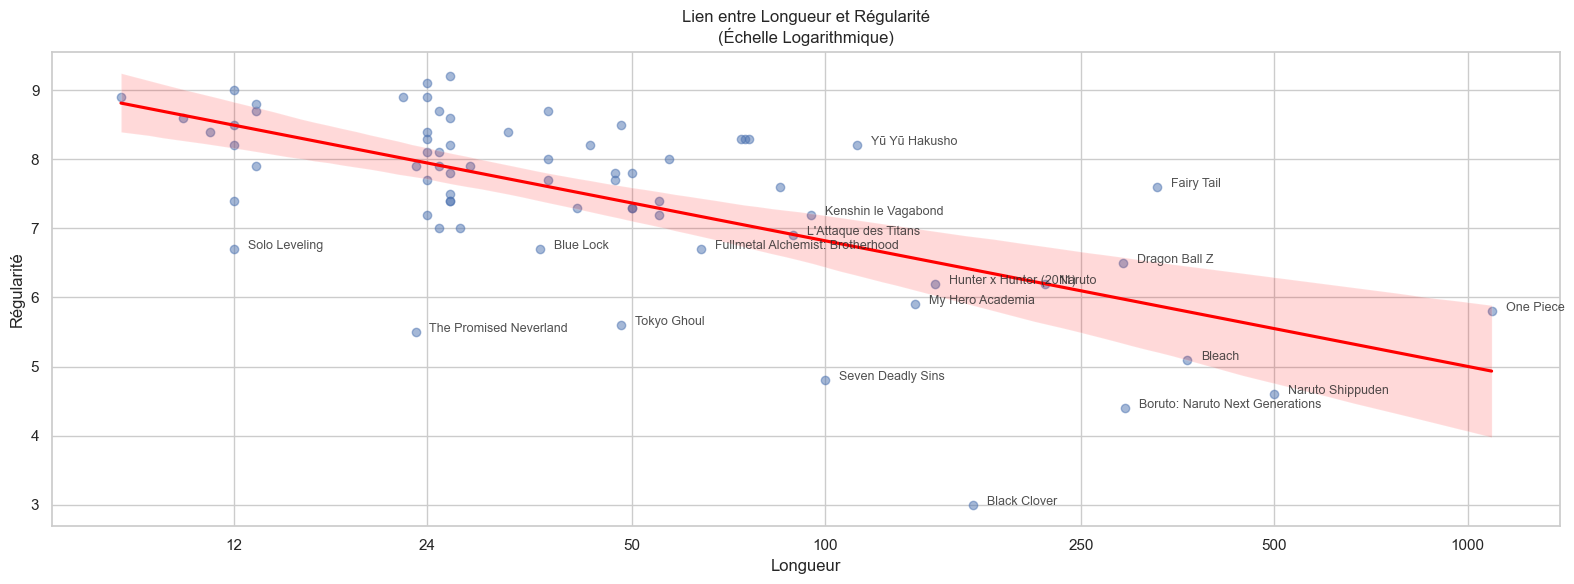

In [22]:
# Graphique: lien entre longueur et régularité
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,6))
plt.title("Lien entre Longueur et Régularité\n(Échelle Logarithmique)", fontsize=12)
plt.xlabel("Longueur (Nb_Episodes)")
plt.ylabel("Régularité (sur 10)")

ax = sns.regplot(data=df_clean, x='Longueur', y='Régularité', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

for i in range(df_clean.shape[0]):
    # On affiche que ceux qui ont beaucoup d'épisodes (ex: log > 4) ou une régularité faible (< 7)
    if df_clean.Longueur.iloc[i] > 4.5 or df_clean.Régularité.iloc[i] < 7:
        plt.text(df_clean.Longueur.iloc[i]+0.05, df_clean.Régularité.iloc[i], 
                 df_clean.Anime.iloc[i], fontsize=9, alpha=0.8)

paliers_episodes = [12, 24, 50, 100, 250, 500, 1000]
ax.set_xticks(np.log(paliers_episodes))
ax.set_xticklabels(paliers_episodes)

plt.tight_layout()
plt.savefig('longueur_vs_regularite.png', dpi=300, bbox_inches='tight', facecolor= "white", transparent=False)
plt.show()

    Corrélation négative: ma ligne rouge est en régression. Plus on avance vers la droite sur l'axe X, c'est-à-dire plus le nombre d'épisodes de l'animé augmente, et plus la ligne descend sur l'axe Y (la régularité baisse). 
    
    A gauche, les animés courts, on peut voir que les points sont globalement situés en haut du graphique (entre 8 et 10 de régularité). C'est plus facile de maintenir une animation parfaite sur un format court.
    
    A droite, les animés longs (100+ épisodes), comme Naruto, Bleach, ou One Piece sont situés plus bas sur l'axe de Régularité. Bien que cultes, ils souffrent techniquement de leur longueur (ex: épisodes fillers). 
    
    Cependant, certains animés, bien qu'assez longs, tel que Yu Yu Hakusho, échappent à cette corrélation négative en ayant une régularité excellente malgré leur longueur. Ce n'est donc pas une fatalité. Et à l'inverse, The Promised Neverland, animé court, ne parvient pas à maintenir une bonne régularité dans son oeuvre. 

    Il y a donc certaines exceptions, positives et négatives, mais dans l'ensemble, on peut affirmer qu'un animé long est en effet plus susceptible d'être instable. 

    Note globale vs Score Qualité
    Ci-dessous, j'analyse mon algorithme et comment il affecte l'ensemble du catalogue. 

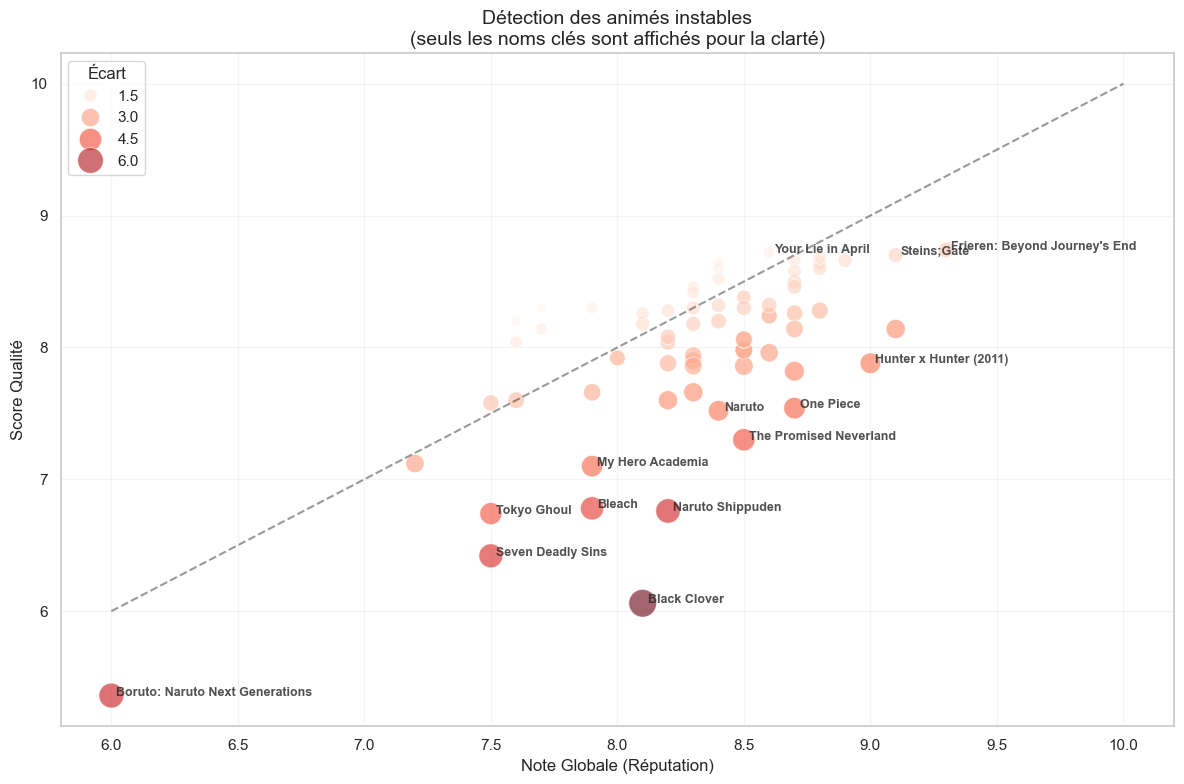

In [23]:
plt.figure(figsize=(12, 8))

# 1. On trace tous les points (le fond)
sns.scatterplot(data=df_clean, x='Note_Globale', y='Score_Qualité', 
                hue='Écart', size='Écart', palette='Reds', sizes=(50, 400), alpha=0.6)

# 2. On trace la ligne de stabilité (la référence)
plt.plot([min(df_clean['Note_Globale']), 10], [min(df_clean['Note_Globale']), 10], 
         color='black', linestyle='--', alpha=0.4, label="Ligne de stabilité") 

# 3. ON AJOUTE LES NOMS STRATÉGIQUES (L'astuce)
for i in range(df_clean.shape[0]):
    nom = df_clean.iloc[i]['Anime']
    note = df_clean.iloc[i]['Note_Globale']
    score = df_clean.iloc[i]['Score_Qualité']
    ecart = df_clean.iloc[i]['Écart']
    
    # RÈGLE : On affiche le nom si c'est le Top 5 OU si l'écart est énorme (> 3.5)
    if score > 8.7 or ecart > 3.5:
        plt.text(note + 0.02, score, nom, fontsize=9, fontweight='bold', alpha=0.8)

plt.title("Détection des animés instables\n(seuls les noms clés sont affichés pour la clarté)", fontsize=14)
plt.xlabel("Note Globale (Réputation)")
plt.ylabel("Score Qualité")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('animes_instables.png', dpi=300, bbox_inches='tight', facecolor= "white", transparent=False)
plt.show()

    Voici comment mon calcul a corrigé les notes. 
    
    La ligne de vérité (pointillés): Cette diagonale représente l'équilibre parfait où Note Globale = Qualité Technique. 

    La zone de sanction (en dessous de la ligne): Les points rouges qui tombent sous la ligne sont les œuvres que l'algorithme a identifiées comme surcotées. Elles bénéficient d'une forte "Hype" (Note Globale élevée) mais souffrent d'une régularité médiocre.

    Le cas Boruto: C'est la sanction la plus visible (en bas à gauche). L'écart entre sa note et son score qualité est abyssal, soulignant une production très inégale.

    Les Shonens fleuves: On retrouve Naruto, One Piece et Black Clover nettement en dessous de la ligne. L'algorithme ne nie pas leur popularité, mais il avertit l'utilisateur: "Attention, c'est culte, mais c'est instable".

    Les déceptions: Des titres comme Seven Deadly Sins ou Tokyo Ghoul sont également lourdement pénalisés, reflétant souvent des saisons finales techniquement faibles qui plombent la moyenne.

    Passons maintenant à l'affichage du top 10. 

In [24]:
# Le top 10 si on se base uniquement sur la note globale
top_10_initial = df_clean.sort_values(by='Note_Globale', ascending=False).head(10)

# On affiche le résultat avec la note à côté pour vérifier
print(f"--- TOP 10 : CLASSEMENT PAR NOTE GLOBALE (Réputation) ---")
print(top_10_initial[['Anime', 'Note_Globale']].reset_index(drop=True))

--- TOP 10 : CLASSEMENT PAR NOTE GLOBALE (Réputation) ---
                              Anime  Note_Globale
0     Frieren: Beyond Journey's End           9.3
1  Fullmetal Alchemist: Brotherhood           9.1
2                       Steins;Gate           9.1
3            Hunter x Hunter (2011)           9.0
4                           Monster           8.9
5      Les Carnets de l'apothicaire           8.8
6                      Cowboy Bebop           8.8
7                    Hajime no Ippo           8.8
8                      Vinland Saga           8.8
9                          Mushishi           8.7


In [25]:
# Le top 10 final, qui se base sur le Score_Qualité, c'est-à-dire accordant 60% d'importance à la note globale et 40% d'importance à la régularité.
top_10_final = df_clean.sort_values(by="Score_Qualité", ascending=False).head(10)
print(f"---- TOP 10 : CLASSEMENT 60% NOTE GLOBALE 40% RÉGULARITÉ (SCORE QUALITÉ) ----")
print(top_10_final[["Anime", "Score_Qualité", "Régularité", "Note_Globale"]].reset_index(drop=True))

---- TOP 10 : CLASSEMENT 60% NOTE GLOBALE 40% RÉGULARITÉ (SCORE QUALITÉ) ----
                           Anime  Score_Qualité  Régularité  Note_Globale
0  Frieren: Beyond Journey's End           8.74         7.9           9.3
1              Your Lie in April           8.72         8.9           8.6
2                    Steins;Gate           8.70         8.1           9.1
3                   Vinland Saga           8.68         8.5           8.8
4                       Mushishi           8.66         8.6           8.7
5                        Monster           8.66         8.3           8.9
6                   Chainsaw Man           8.64         9.0           8.4
7   Les Carnets de l'apothicaire           8.64         8.4           8.8
8                 Hajime no Ippo           8.60         8.3           8.8
9       Du mouvement de la Terre           8.60         8.9           8.4


    Tout de suite, on peut s'apercevoir que le top 10 avant et après prise en compte de la feature "Score_Qualité" n'est pas le même. Certains animés, à la note globale pourtant haute, quittent le classement (exemples: FMA: Brotherhood, Hunter x Hunter 2011) car leur irrégularité fait que leur score qualité en prend un coup. D'autres, à l'inverse, accèdent au classement (exemples: Your Lie in April, Chainsaw Man - régularité excellente estimée à 9.0). Enfin, certains restent dans le top 10, mais perdent en positionnement ou inversement. 

    Graphique ci-dessous pour une représentation visuelle plus parlante:

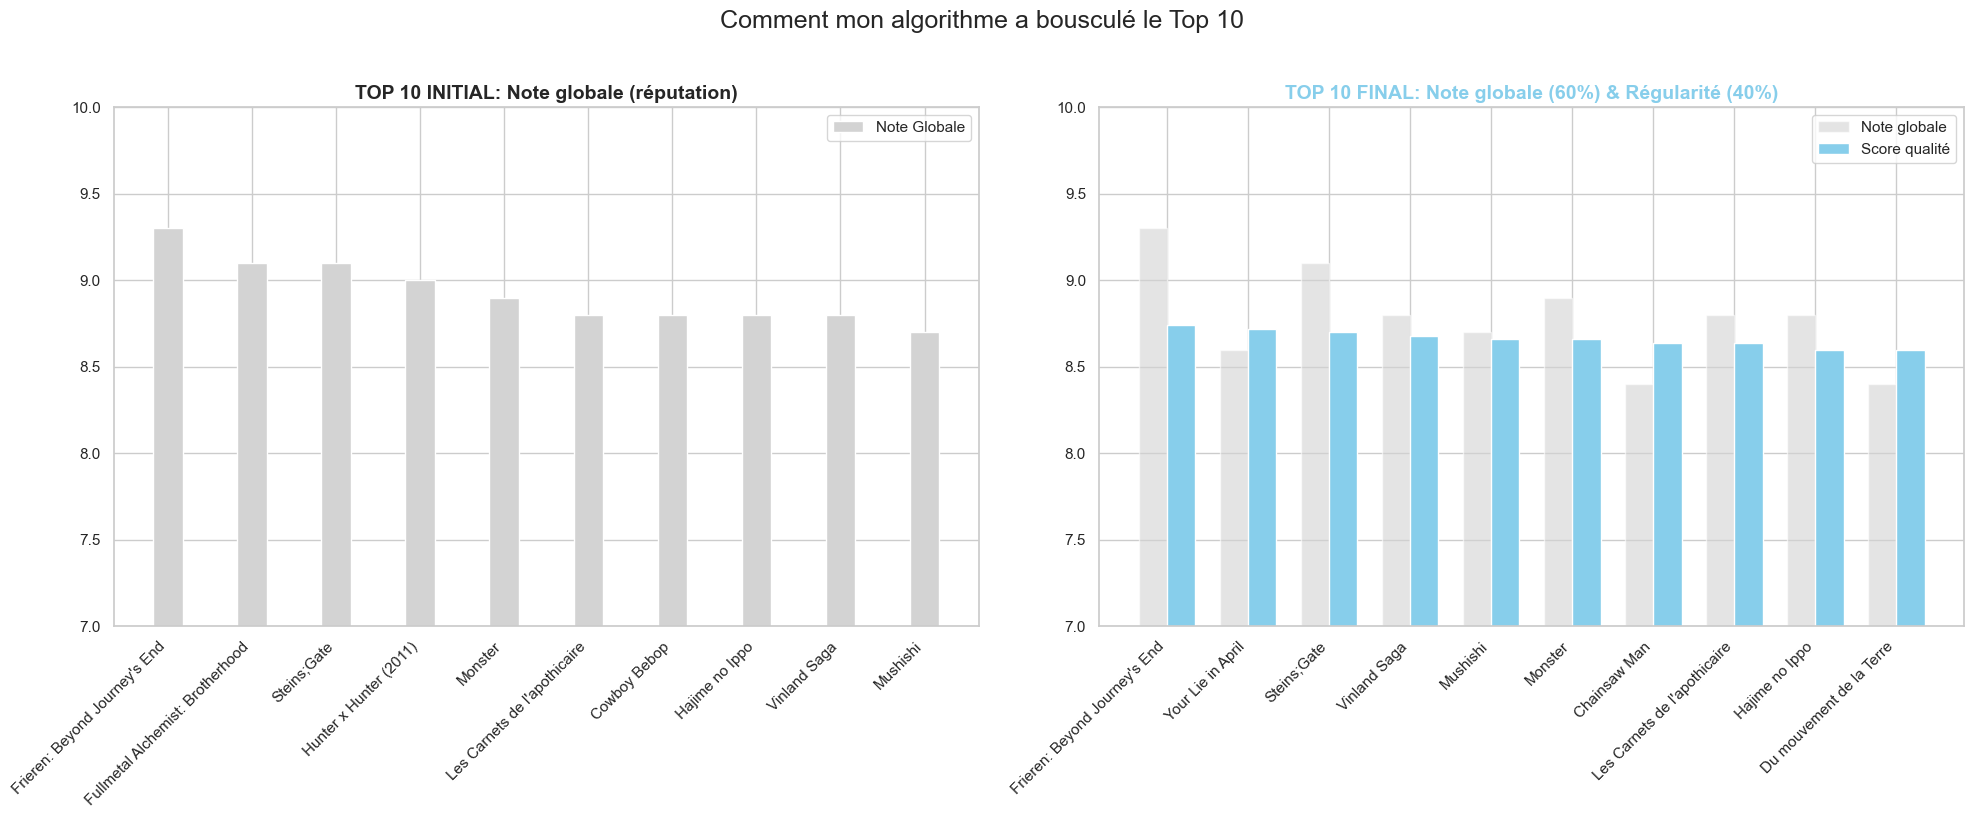

In [26]:
# Préparation de l'histogramme des deux top 10
# Le top 10 initial, basé uniquement sur la note globale. 
top_10_initial = df_clean.sort_values(by='Note_Globale', ascending=False).head(10)

# Le top 10 basé sur mon Score Qualité
top_10_final = df_clean.sort_values(by='Score_Qualité', ascending=False).head(10)

# La base
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
width = 0.35

# Histogramme 1: Top 10 initial
x1 = np.arange(len(top_10_initial)) # Le squelette horizontal du graphique
ax1.bar(x1, top_10_initial['Note_Globale'], width, color='lightgrey', label='Note Globale')
ax1.set_xticks(x1)
ax1.set_xticklabels(top_10_initial['Anime'], rotation=45, ha='right')
ax1.set_ylim(7, 10)
ax1.set_title("TOP 10 INITIAL: Note globale (réputation)", fontsize=14, fontweight='bold')
ax1.legend()

# Histogramme 2: Top 10 final
x2 = np.arange(len(top_10_final))
ax2.bar(x2 - width/2, top_10_final['Note_Globale'], width, label='Note globale', color='lightgrey', alpha=0.6)
ax2.bar(x2 + width/2, top_10_final['Score_Qualité'], width, label='Score qualité', color='skyblue')
ax2.set_xticks(x2)
ax2.set_xticklabels(top_10_final['Anime'], rotation=45, ha='right')
ax2.set_ylim(7, 10)
ax2.set_title("TOP 10 FINAL: Note globale (60%) & Régularité (40%)", fontsize=14, fontweight='bold', color='skyblue')
ax2.legend()

plt.suptitle("Comment mon algorithme a bousculé le Top 10", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('top10_comparaison.png', dpi=300, bbox_inches='tight', facecolor= "white", transparent=False)
plt.show()

    J'ai crée un histogramme qui présente d'un côté, le top 10 initial des animés si l'on se base uniquement sur la note globale, et de l'autre le top 10 une fois que l'on prend en compte la régularité, un facteur important que j'estime à 40%. On voit alors clairement que le top 10 initial se voit pas mal bouleversé, avec des animés populaires quittant le podium, et d'autres qui le sont moins, se frayant un chemin.

**SEGMENTATION ÉDITORIALE**

    Cette classification permet d'orienter la mise en avant des contenus sur la plateforme.

In [27]:
def attribuer_categorie(anime):
    if anime["Score_Qualité"] >= 8.6 and anime["Régularité"] >= 8.5:
        return "Les incontournables" # note globale haute, régularité haute

    elif anime["Score_Qualité"] > anime["Note_Globale"] and anime["Régularité"] >= 8.5:
        return "Pépites cachées" # score qualité s'avère plus élevé que la note globale car régularité au top 

    elif anime["Note_Globale"] >= 8.5 and anime["Régularité"] < 8.0:
        return "Culte mais inégal" # note globale haute, régularité plus faible

    elif anime["Score_Qualité"] >= 8.0:
        return "Valeur sûre !" # note globale et régularité superbes

    else: 
        return "Divertissement correct" # note globale et régularité correctes

df_clean["Segment_Editorial"] = df_clean.apply(attribuer_categorie, axis=1)

# Test
print(df_clean[['Anime', 'Note_Globale', 'Régularité', "Segment_Editorial"]].head(40))

                               Anime  Note_Globale  Régularité  \
0                             Naruto           8.4         6.2   
1                             Trigun           8.2         7.4   
2                      Dragon Ball Z           8.7         6.5   
3   Fullmetal Alchemist: Brotherhood           9.1         6.7   
4                       Cowboy Bebop           8.8         7.5   
5                   Sword Art Online           7.2         7.0   
6                            Re:Zero           8.2         7.8   
7                          Dr. Stone           8.3         8.0   
8                          One Piece           8.7         5.8   
9                          Blue Lock           8.2         6.7   
10                         Haikyuu!!           8.7         7.6   
11                     One Punch Man           8.5         7.2   
12                     Solo Leveling           8.3         6.7   
13      Les Carnets de l'apothicaire           8.8         8.4   
15        

    L'algorithme attribue une étiquette selon des conditions strictes croisant Note Globale et Régularité:

    Les Incontournables: L'élite absolue. Note Globale ET Régularité très élevées (> 8.5). À mettre en tête de gondole.
    
    Pépites cachées : La découverte. Le Score Qualité calculé est supérieur à la Note Globale, révélant une œuvre techniquement sous-estimée par le grand public.

    Culte mais inégal: Le piège. Une popularité immense (> 8.5) mais une stabilité technique plus faible (< 8.0). Idéal pour l'acquisition (le nom attire), mais risqué pour la rétention (la qualité déçoit).

    Valeur sûre: Des œuvres solides (score > 8.0) sans être des chefs-d'œuvre absolus. Le choix du risque zéro.

    Divertissement correct: Le reste du catalogue. Des œuvres pour passer le temps, sans garantie de qualité exceptionnelle.

In [28]:
print(df_clean["Segment_Editorial"].value_counts())

Segment_Editorial
Divertissement correct    20
Culte mais inégal         18
Valeur sûre !             18
Pépites cachées            9
Les incontournables        5
Name: count, dtype: int64


    La distribution des 70 animés du dataset révèle une structure intéressante:

    Une rareté de l'excellence (5 "Incontournables"): Seuls 5 animés cochent toutes les cases. C'est cohérent, les chefs-d'œuvre sont rares.

    Le poids de la Hype (18 "Culte mais inégal"): C'est un chiffre clé. 25% du catalogue est composé de "blockbusters instables" (type Shonen fleuve). Cela valide notre problématique initiale, se fier uniquement à la popularité (note globale) est dangereux.

    L'opportunité (9 "Pépites cachées"): Nous avons identifié 9 œuvres que l'algorithme valorise plus que le public. C'est sur ce segment que l'équipe éditoriale peut créer de la valeur ajoutée en les recommandant activement.

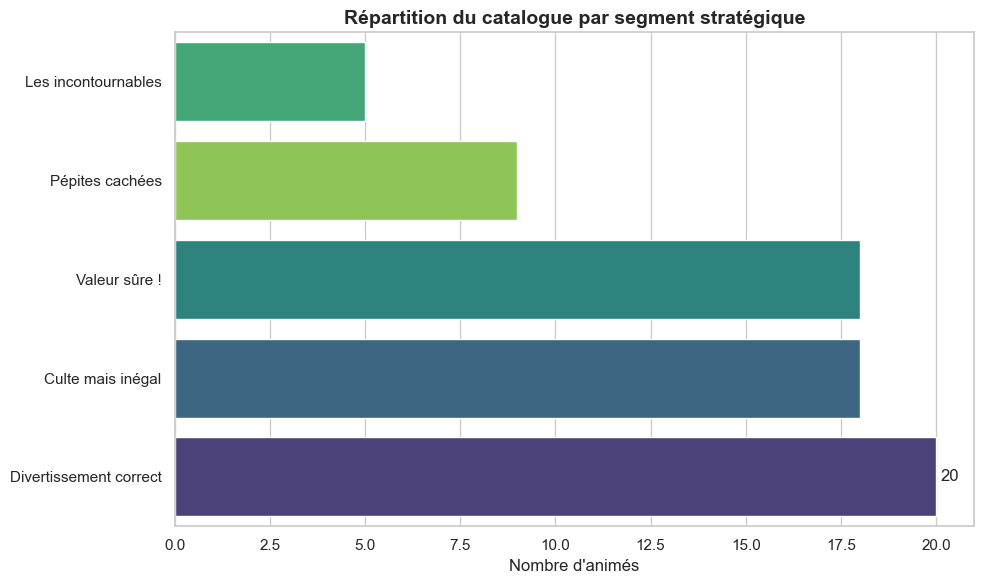

In [29]:
# Ordre logique pour l'affichage (du meilleur au moins bon)
ordre_segments = ["Les incontournables", "Pépites cachées", "Valeur sûre !", "Culte mais inégal", "Divertissement correct"]

plt.figure(figsize=(10, 6))
ax = sns.countplot(y="Segment_Editorial", data=df_clean, order=ordre_segments, hue="Segment_Editorial", legend=False, palette="viridis")

plt.title("Répartition du catalogue par segment stratégique", fontsize=14, fontweight='bold')
plt.xlabel("Nombre d'animés")
plt.ylabel("")

# Ajouter les chiffres au bout des barres
ax.bar_label(ax.containers[0], padding=3)

plt.tight_layout()
plt.savefig('répartition_catalogue.png', dpi=300, bbox_inches='tight', facecolor= "white", transparent=False)
plt.show()

In [30]:
les_incontournables = df_clean[df_clean["Segment_Editorial"] == "Les incontournables"]
print(les_incontournables[["Anime", "Note_Globale", "Régularité", "Score_Qualité"]])

                       Anime  Note_Globale  Régularité  Score_Qualité
15  Du mouvement de la Terre           8.4         8.9           8.60
31                  Mushishi           8.7         8.6           8.66
43         Your Lie in April           8.6         8.9           8.72
52              Chainsaw Man           8.4         9.0           8.64
53              Vinland Saga           8.8         8.5           8.68


In [31]:
pepites_cachees = df_clean[df_clean["Segment_Editorial"] == "Pépites cachées"]
print(pepites_cachees[["Anime", "Note_Globale", "Régularité", "Score_Qualité"]])

                           Anime  Note_Globale  Régularité  Score_Qualité
36               Hell's Paradise           7.7         8.8           8.14
37  My Hero Academia: Vigilantes           7.6         8.7           8.04
38                      Claymore           7.7         9.2           8.30
41                      One Outs           8.3         8.7           8.46
42            Zetsuen No Tempest           7.9         8.9           8.30
55     Mashle: Magic and Muscles           7.6         9.1           8.20
56                    SPY×FAMILY           8.4         8.7           8.52
64        Cyberpunk: Edgerunners           8.3         8.6           8.42
69               No Game No Life           8.1         8.5           8.26


In [32]:
valeur_sure = df_clean[df_clean["Segment_Editorial"] == "Valeur sûre !"]
print(valeur_sure[["Anime", "Note_Globale", "Régularité", "Score_Qualité"]])

                           Anime  Note_Globale  Régularité  Score_Qualité
6                        Re:Zero           8.2         7.8           8.04
7                      Dr. Stone           8.3         8.0           8.18
13  Les Carnets de l'apothicaire           8.8         8.4           8.64
16              Samurai Champloo           8.5         8.2           8.38
21                   Steins;Gate           9.1         8.1           8.70
22                           GTO           8.7         8.2           8.50
27           Parasite: La Maxime           8.3         8.3           8.30
44                       Monster           8.9         8.3           8.66
45                Hajime no Ippo           8.8         8.3           8.60
47                 Yū Yū Hakusho           8.5         8.2           8.38
49        The Eminence in Shadow           8.2         8.4           8.28
57                    Dan Da Dan           8.4         8.2           8.32
59               Kuroko's Basket      

In [33]:
culte_inegal = df_clean[df_clean["Segment_Editorial"] == "Culte mais inégal"]
print(culte_inegal[["Anime", "Note_Globale", "Régularité", "Score_Qualité"]])

                               Anime  Note_Globale  Régularité  Score_Qualité
2                      Dragon Ball Z           8.7         6.5           7.82
3   Fullmetal Alchemist: Brotherhood           9.1         6.7           8.14
4                       Cowboy Bebop           8.8         7.5           8.28
8                          One Piece           8.7         5.8           7.54
10                         Haikyuu!!           8.7         7.6           8.26
11                     One Punch Man           8.5         7.2           7.98
17              L'Attaque des Titans           8.5         6.9           7.86
18                        Death Note           8.6         7.7           8.24
19            Hunter x Hunter (2011)           9.0         6.2           7.88
20                        Code Geass           8.7         7.3           8.14
28                      Demon Slayer           8.5         7.2           7.98
33                    Jujutsu Kaisen           8.6         7.7  



**Recommandation éditoriale**

In [34]:
def recommandation_editoriale(nom_anime, nb_recos=3):
    if nom_anime not in df_clean["Anime"].values:
        return "L'animé n'est pas dans la base de données."

    anime_genre = df_clean[df_clean["Anime"] == nom_anime]["Genre_Principal"].values[0] # J'extrais le genre principal de l'anime

    recos = df_clean[(df_clean['Genre_Principal'] == anime_genre) & (df_clean['Anime'] != nom_anime)].copy()
    recos = recos.sort_values(by='Score_Qualité', ascending=False).head(3) # Je recommande les animés selon mon score qualité
   
    
    # On retourne le top pour le curateur
    return recos[['Anime', 'Note_Globale', 'Score_Qualité']].head(nb_recos)


        

     Mon sytème de recommandation vérifie l'existence de l'œuvre et identifie son genre principal pour garantir une cohérence thématique.  Il isole tous les animés du même genre, en excluant celui déjà visionné par l'utilisateur.  Au lieu de trier par popularité brute (note globale), le moteur trie les résultats selon mon Score Qualité (60% Note / 40% Régularité).  Il retourne ensuite le top 3 des œuvres les plus "sûres" et qualitatives pour maximiser la rétention.

In [35]:
# Test de mon système de recommandation 
recommandation_editoriale("Made in Abyss")

,Anime,Note_Globale,Score_Qualité
35,Frieren: Beyond Journey's End,9.3,8.74
53,Vinland Saga,8.8,8.68
16,Samurai Champloo,8.5,8.38


    Mon système de recommandation fonctionne parfaitement. Pour 'Made in Abyss', un animé d'aventure, il me recommande 3 autres animés centrés sur l'aventure aussi. Cependant, il ne se contente pas que de ça, il met en avant des animés au score qualité élevé; ils sont dont qualitatifs et réguliers. Tout est fait pour ne pas décevoir l'utilisateur. 

**Bilan du projet**

    L'objectif était de créer un outil capable d'identifier des animés à "forte valeur éditoriale" pour une plateforme de streaming. En dépassant la simple métrique de popularité (note globale) et en introduisant une métrique de stabilité (régularité), nous avons réussi à:

    - Assainir la donnée: nettoyage (doublons, anomalies), conversion (dates, logarithme), extrait du genre principal.

    - Créer de la valeur: L'algorithme 60/40 (Score Qualité) a permis de reclasser le catalogue en mettant en avant des œuvres plus fiables pour la rétention (Frieren, Your Lie in April, Steins;Gate pour citer le top 3).

    - Personnaliser l'expérience: Le moteur de recommandation final propose des alternatives cohérentes et sécurisantes, évitant les déceptions liées aux suites inégales.

**Perspectives**

    Pourquoi pas envisager le développement des features suivantes lors d'une V2 du projet:

        - Élargir le dataset: Tester le modèle sur un catalogue de 1000+ animés pour éprouver sa robustesse.
        
        - Interface utilisateur: Développer une petite application web interactive (Streamlit) pour rendre l'outil accessible aux équipes éditoriales.

        - L'analyse des sentiments (NLP): Utiliser le Traitement du Langage Naturel sur les commentaires écrits pour qualifier l'émotion de l'œuvre (ex: "Émouvant", "Épique", "Relaxant"). Cela permettrait d'affiner davantage la recommandation éditoriale. 

        - Le binge-watching score: Croiser les données de régularité avec la durée des arcs narratifs pour créer un score de "Binge-ability". Cela permettrait de différencier les œuvres à consommer d'une traite (fort suspense, cliffhangers) de celles à consommer épisodiquement (week-end VS semaine) 

In [36]:
# Sauvegarde du df désormais clean 
df_clean.to_csv('animes_clean_final.csv', index=False)